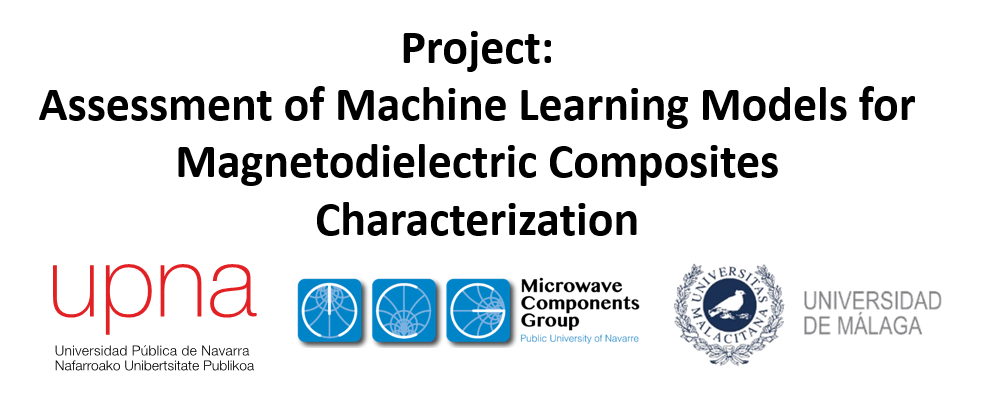


**Autors:**  
N. Duque-Madrid<sup>1</sup>, F. Luna<sup>2</sup>, G. Álvarez-Botero<sup>1</sup>, I. Arregui<sup>1</sup>, T. Lopetegi<sup>1</sup>, M. A. G. Laso<sup>1</sup>

<sup>1</sup> Institute of Smart Cities (ISC), Department of Electrical, Electronic and Communications Engineering, Public University of Navarre (UPNA), Campus Arrosadia, 31006 Pamplona, España.  
<sup>2</sup> Department of Languages and Computer Science University of Malaga.    
 


### **1. Dataset Description** 

The dataset has been generated through full-wave electromagnetic simulations in CST. The dataset contains 2554 samples. 

 
 ##### Feature and Target Overview:
##### Permittivity Features:
- 'fr_ε': Resonance frecuency
- '|Γ_ε|' : Magnitude of the reflection coefficient
- 'Loss_ε': Losses
- 'Bw_ε': Bandwidth

##### Permeability Features:
- 'fr_μ': Resonance frecuency of the permeability sensor
- '|Γ_μ|': Magnitude of the reflection coefficient
- 'Loss_μ': Losses
- 'Bw_μ': Bandwidth

##### Target Variables: 
- 'Permittivity_μr'
- 'Permeability_εr'
- 'tanδε'
- 'tanδμ'

#### **1.1. Read and load the dataset**

#### **Import libraries**

In [22]:
# MAKE SURE TO EXECUTE THIS CELL BEFORE RUNNING ANY OTHERS.
import time
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score

In [14]:
# Read file
df_mg=pd.read_csv("data_magnetodielectric", delimiter=',', header=0) # df_mg is a DataFrame containing the full dataset

In [15]:
# Run this cell to display a preview of the dataset
df_mg

,frε,|Γ|frε,Loss_ε,Bw_ε,frμ,|Γ|frμ,Loss_μ,Bw_μ,μr,εr,tanδε,tanδμ
0,2.482,-25.047517,0.944073,0.060304,2.479,-23.017686,0.929349,0.060441,1.00,1.00,0.0,0.0
1,2.451,-30.290531,0.969417,0.057049,2.479,-23.115503,0.930141,0.060436,1.00,1.50,0.0,0.0
2,2.420,-38.449053,0.988045,0.054050,2.479,-22.872997,0.928163,0.060410,1.00,2.00,0.0,0.0
3,2.388,-30.942341,0.971628,0.051215,2.479,-23.110048,0.930097,0.060416,1.00,2.50,0.0,0.0
4,2.355,-25.264810,0.945454,0.049039,2.479,-22.796250,0.927525,0.060007,1.00,3.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2549,2.401,-8.885490,0.640478,0.068865,2.363,-16.649660,0.852932,0.067788,3.25,2.25,0.1,0.1
2550,2.361,-7.380751,0.572474,0.065871,2.361,-16.618058,0.852396,0.068124,3.25,2.75,0.1,0.1
2551,2.330,-6.386688,0.520636,0.062527,2.357,-16.167590,0.844539,0.068036,3.25,3.25,0.1,0.1
2552,2.310,-5.762429,0.484915,0.060282,2.356,-16.185969,0.844868,0.067023,3.25,3.75,0.1,0.1


In [16]:
# checking missing and null values 
df_mg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2554 entries, 0 to 2553
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   frε     2554 non-null   float64
 1   |Γ|frε  2554 non-null   float64
 2   Loss_ε  2554 non-null   float64
 3   Bw_ε    2554 non-null   float64
 4   frμ     2554 non-null   float64
 5   |Γ|frμ  2554 non-null   float64
 6   Loss_μ  2554 non-null   float64
 7   Bw_μ    2554 non-null   float64
 8   μr      2554 non-null   float64
 9   εr      2554 non-null   float64
 10  tanδε   2554 non-null   float64
 11  tanδμ   2554 non-null   float64
dtypes: float64(12)
memory usage: 239.6 KB


### **2. Preprocessing Data**

#### **2.1 Partitioning**

The data partitioning is performed with the aim of evaluating the model’s performance in a controlled and structured way. In this case, `20%` of the total dataset is allocated to the `test set`, which will be used exclusively at the end of the process to assess the generalization ability of the models using "unseen" data. From the remaining `80%`, which constitutes the `training set`, an additional `20%` is reserved to create a `validation set`. This validation set helps in tuning hyperparameters and making adjustments to the models during training. This strategy ensures that the models are trained on the largest possible amount of data while maintaining an independent subset for evaluation and another for validation, avoiding data leakage and providing more reliable metrics.

In [17]:
# ---------------------------------------------------------------------
# Data partitioning is performed using the train_test_split function
# ---------------------------------------------------------------------
X = df_mg.iloc[:, :8] # X is a DataFrame containing only the features (input variables) located in columns 1 to 8 of the df_mg
y = df_mg.iloc[:, 8:] # y is a DataFrame containing only the labels (target variables) located in columns 9 to 12 of the df_mg

# ---------------------------------------------------------------------
# Split into training and test sets
# ---------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=16) 

# ---------------------------------------------------------------------
# Split the training set into training and validation subsets
# ---------------------------------------------------------------------
xtrain, xval, ytrain, yval = train_test_split(X_train, y_train, train_size=0.80, random_state=16)

print("Partition dimensions: \nTraining: {}\nValidation: {}\nTest: {}\nLabels in training set: {}\nLabels in validation set: {}\nLabels in test set: {}".format(xtrain.shape,xval.shape,X_test.shape, ytrain.shape, yval.shape, y_test.shape))


Partition dimensions: 
Training: (1634, 8)
Validation: (409, 8)
Test: (511, 8)
Labels in training set: (1634, 4)
Labels in validation set: (409, 4)
Labels in test set: (511, 4)


### **3. Training Models**


 
#### **3.1 Linear Regresion with Polynomial Features without regularization**

This script builds a scikit-learn Pipeline that creates polynomial features, scales them, and fits a linear regression. It uses GridSearchCV with 5-fold cross-validation to search for the best polynomial degree. After the grid search, the best model is used to predict on training and validation sets and evaluated with MSE, RMSE and R<sup>2</sup>.

In [19]:
# ---------------------------------------------------------------------
# Build a pipeline:
# - 'poly': expand features to polynomial terms (degree to be tuned)
# - 'scaler':  StandardScaler standardizes features (zero mean, unit variance)
# - 'reg': estimator to be tuned linear regression without regularization
# ---------------------------------------------------------------------
pipe_lr = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)), 
    ('scaler', StandardScaler()), 
    ('reg', LinearRegression())
])

# Note: Pipeline prevents leakage, because PolynomialFeatures and StandardScaler are inside the pipeline, cross-validation will correctly fit transformers on each training fold and apply 
# them to the corresponding validation fold — this avoids data leakage.

# ---------------------------------------------------------------------
# Hyperparameter for linear regression
# - 'degrees': polynomial degrees 2, 3, 4, 5, 6 (np.arange(2,7) does NOT include 7)
# ---------------------------------------------------------------------
degrees = np.arange(2, 7)

parameters = {
    'poly__degree': degrees
}

# ---------------------------------------------------------------------
# Cross-validation strategy: 5-fold CV with shuffling
# ---------------------------------------------------------------------
cv_strategy = KFold(n_splits=5, shuffle=True, random_state=0)

# ---------------------------------------------------------------------
# GridSearchCV configuration:
# - estimator: pipeline (pipeline_lr)
# - parameters: hyperparameters dictionary (parameters)
# - cv: cross-validation strategy (cv-strategy)
# - scoring: negative MSE (scikit-learn convention: higher = better)
# - refit=True: after search, refit the best params on the whole training set
# ---------------------------------------------------------------------
gridsearch = GridSearchCV(
    pipe_lr,
    parameters,
    cv=cv_strategy,
    scoring='neg_mean_squared_error',
    refit=True,
    return_train_score=True
)

# ---------------------------------------------------------------------
# Fit grid-search on training data (xtrain, ytrain must be defined)
# ---------------------------------------------------------------------
gridsearch.fit(xtrain, ytrain)

# ---------------------------------------------------------------------
# Retrieve best estimator 
# ---------------------------------------------------------------------
best_model_lr = gridsearch.best_estimator_

# ---------------------------------------------------------------------
# Note: gridsearch.best_score_ is the CV score using the selected scoring,
# scikit-learn returns negative MSE for 'neg_mean_squared_error', so multiply by -1
# ---------------------------------------------------------------------
print('Best model:')
print(f"   Degree: {gridsearch.best_estimator_['poly'].degree}")
print(f"   CV MSE: {-gridsearch.best_score_:.6f}" )

# ---------------------------------------------------------------------
# Predictions on training and external validation sets (xval, yval must be defined)
# ---------------------------------------------------------------------
y_train_pred = best_model_lr.predict(xtrain)
y_val_pred = best_model_lr.predict(xval)  

# ---------------------------------------------------------------------
# Compute evaluation metrics: MSE, RMSE, R²
# ---------------------------------------------------------------------
mse_train = mean_squared_error(ytrain, y_train_pred)
mse_val = mean_squared_error(yval, y_val_pred)

rmse_train = np.sqrt(mse_train)
rmse_val = np.sqrt(mse_val)

r2_train = r2_score(ytrain, y_train_pred)
r2_val = r2_score(yval, y_val_pred)
print("--------------------\nMetrics:\n--------------------")
print(f"Training:      MSE = {mse_train:.6f}, RMSE = {rmse_train:.6f}, R² = {r2_train:.6f}")
print(f"Validation: MSE = {mse_val:.6f}, RMSE = {rmse_val:.6f}, R² = {r2_val:.6f}")

Best model:
   Degree: 2
   CV MSE: 0.001445
--------------------
Metrics:
--------------------
Training:      MSE = 0.001239, RMSE = 0.035198, R² = 0.996458
Validation: MSE = 0.001151, RMSE = 0.033933, R² = 0.996308


#### **3.2. Linear Regression with Polynomial Features and regularization**

This script builds a scikit-learn Pipeline that creates polynomial features, scales them, and fits a Ridge regression. It uses GridSearchCV with 5-fold cross-validation to search for the best polynomial degree and regularization strength (alpha). After the grid search, the best model is used to predict on training and validation sets and evaluated with MSE, RMSE and R<sup>2</sup>.

In [20]:
# ---------------------------------------------------------------------
# Build a pipeline:
#  - 'poly': expand features to polynomial terms (degree to be tuned)
#  - 'scaler': StandardScaler standardizes features (zero mean, unit variance). 
#  - 'reg': estimator to be tuned linear regression with ridge regularization (alpha to be tuned)
# ---------------------------------------------------------------------
pipe_lr_reg = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)), 
    ('scaler', StandardScaler()), 
    ('reg', Ridge(random_state=16))
])

# ---------------------------------------------------------------------
# Hyperparameters for ridge
# - 'degrees': polynomial degrees 2, 3, 4, 5, 6 (np.arange(2,7) does NOT include 7)
# - 'reg_values': geometric sequence of 6 alpha values (regularization strengths)
# ---------------------------------------------------------------------
degrees = np.arange(2, 7)  
reg_values = np.geomspace(1e-5, 1, num=6) 

parameters = {
    'poly__degree': degrees,
    'reg__alpha': reg_values
}


# ---------------------------------------------------------------------
# Cross-validation strategy: 5-fold CV with shuffling
# ---------------------------------------------------------------------
cv_strategy = KFold(n_splits=5, shuffle=True, random_state=0)

# ---------------------------------------------------------------------
# GridSearchCV configuration:
# - estimator: pipeline (pipe_reg_lr)
# - cv: cross-validation strategy (cv-strategy)
# - parameters: hyperparameters dictionary (parameters)
# - scoring: negative MSE (scikit-learn convention: higher = better)
# - refit=True: after search, refit the best params on the whole training set
# ---------------------------------------------------------------------
gridsearch = GridSearchCV(
    pipe_lr_reg,
    parameters,
    cv=cv_strategy,
    scoring='neg_mean_squared_error',
    refit=True,
    return_train_score=True
)

# ---------------------------------------------------------------------
# Fit grid-search on training data (xtrain, ytrain must be defined)
# ---------------------------------------------------------------------
gridsearch.fit(xtrain, ytrain)

# ---------------------------------------------------------------------
# Retrieve best estimator 
# ---------------------------------------------------------------------
best_model_lr_reg = gridsearch.best_estimator_

# ---------------------------------------------------------------------
# Note: gridsearch.best_score_ is the CV score using the selected scoring,
# scikit-learn returns negative MSE for 'neg_mean_squared_error', so multiply by -1
# ---------------------------------------------------------------------

print('Best model:')
print(f"   Degree: {gridsearch.best_estimator_['poly'].degree}")
print(f"   alpha: {gridsearch.best_estimator_['reg'].alpha}")
print(f"   CV MSE: {-gridsearch.best_score_:.6f}" )



# ---------------------------------------------------------------------
# Predictions on training and external validation sets (xval, yval must be defined)
# ---------------------------------------------------------------------
y_train_pred = best_model_lr_reg.predict(xtrain)
y_val_pred = best_model_lr_reg.predict(xval)  

# ---------------------------------------------------------------------
# Compute evaluation metrics: MSE, RMSE, R²
# ---------------------------------------------------------------------
mse_train = mean_squared_error(ytrain, y_train_pred)
mse_val = mean_squared_error(yval, y_val_pred)

rmse_train = np.sqrt(mse_train)
rmse_val = np.sqrt(mse_val)

r2_train = r2_score(ytrain, y_train_pred)
r2_val = r2_score(yval, y_val_pred)

print("--------------------\nMetrics:\n--------------------")
print(f"Training:      MSE = {mse_train:.6f}, RMSE = {rmse_train:.6f}, R² = {r2_train:.6f}")
print(f"Validation: MSE = {mse_val:.6f}, RMSE = {rmse_val:.6f}, R² = {r2_val:.6f}")

Best model:
   Degree: 3
   alpha: 1e-05
   CV MSE: 0.001207
--------------------
Metrics:
--------------------
Training:      MSE = 0.000926, RMSE = 0.030427, R² = 0.997678
Validation: MSE = 0.000989, RMSE = 0.031443, R² = 0.997285


#### **3.3 Support Vector Machine: multi-output Support Vector Regressor**
This script builds a scikit-learn Pipeline that standardizes input features and fits a multi-output Support Vector Regressor by wrapping SVR with MultiOutputRegressor using $rbf$ $kernel$. It performs a grid search with 5-fold cross-validation to tune the SVR hyperparameters C (regularization) and epsilon (insensitive loss width). The best model is evaluated on a separate validation set using MSE, RMSE and R<sup>2</sup>.

In [21]:
# ---------------------------------------------------------------------
# Build a pipeline:
# - 'scaler': StandardScaler to center and scale features 
# - 'reg': estimator to be tuned MultiOutputRegressor wrapping an SVR estimator (RBF kernel by default)
# ---------------------------------------------------------------------
pipe_svr_rbf = Pipeline([
    ('scaler', StandardScaler()),
    ('reg', MultiOutputRegressor(SVR()))
])

# ---------------------------------------------------------------------
# Hyperparameters for SVR (inner estimator of MultiOutputRegressor)
# - 'reg__estimator__C': regularization parameter (higher -> less regularization)
# - 'reg__estimator__epsilon': epsilon-insensitive tube width
# Note: param names use the pipeline + wrapper prefix convention
# ---------------------------------------------------------------------

param_grid_svr_rbf = {
    'reg__estimator__C': [0.1, 1, 10, 100],
    'reg__estimator__epsilon': [0.001, 0.01, 0.1]
}

# ---------------------------------------------------------------------
# Cross-validation strategy: 5-fold CV with shuffling
# ---------------------------------------------------------------------
cv_strategy = KFold(n_splits=5, shuffle=True, random_state=0)


# ---------------------------------------------------------------------
# GridSearchCV configuration
# - estimator: pipeline (pipe_svr_rbf)
# - parameters: hyperparameters dictionary (param_grid_svr_rbf)
# - cv: cross-validation strategy (cv-strategy)
# - scoring='neg_mean_squared_error': returns negative MSE by sklearn convention
# - refit=True: will refit the best params on the entire training set
# - return_train_score=True: keeps training scores in cv_results_
# - n_jobs=-1: uses all available CPU cores
# ---------------------------------------------------------------------
gridsearch_svr_rbf = GridSearchCV(pipe_svr_rbf, param_grid_svr_rbf,
                          cv=cv_strategy,
                          scoring='neg_mean_squared_error',
                          refit=True,
                          return_train_score=True,
                          n_jobs=-1)

# ---------------------------------------------------------------------
# Fit the grid search on training data (xtrain, ytrain must be defined)
# ---------------------------------------------------------------------
gridsearch_svr_rbf.fit(xtrain, ytrain)

# ---------------------------------------------------------------------
# Retrieve the best model
# ---------------------------------------------------------------------
best_model_svr_rbf = gridsearch_svr_rbf.best_estimator_

print('Best model:')
print(f"  C value: {best_model_svr_rbf['reg'].estimators_[0].C}")
print(f"  Epsilon: {best_model_svr_rbf['reg'].estimators_[0].epsilon}")
print(f"  CV MSE (best): {-gridsearch_svr_rbf.best_score_:.2f}")


# ---------------------------------------------------------------------
# Predictions on training and external validation sets (xval, yval must be defined)
# ---------------------------------------------------------------------
y_train_pred = best_model_svr_rbf.predict(xtrain)
y_val_pred = best_model_svr_rbf.predict(xval)

# ---------------------------------------------------------------------
# Compute evaluation metrics: MSE, RMSE, R²
# ---------------------------------------------------------------------
mse_train = mean_squared_error(ytrain, y_train_pred)
mse_val = mean_squared_error(yval, y_val_pred)
r2_train = r2_score(ytrain, y_train_pred)
r2_val = r2_score(yval, y_val_pred)
rmse_train = np.sqrt(mse_train)
rmse_val = np.sqrt(mse_val)

print("--------------------\nMetrics:\n--------------------")
print(f"Training:      MSE = {mse_train:.6f}, RMSE = {rmse_train:.6f}, R² = {r2_train:.6f}")
print(f"Validation: MSE = {mse_val:.6f}, RMSE = {rmse_val:.6f}, R² = {r2_val:.6f}")

Best model:
  C value: 10
  Epsilon: 0.01
  CV MSE (best): 0.00
--------------------
Metrics:
--------------------
Training:      MSE = 0.000587, RMSE = 0.024234, R² = 0.986145
Validation: MSE = 0.001040, RMSE = 0.032246, R² = 0.983813


#### **3.4 Support Vector Machine: multi-output Support Vector Regressor**
This script builds a scikit-learn pipeline that standardizes input features and fits a multi-output Support Vector Regressor by wrapping SVR with MultiOutputRegressor using $poly$ $kernel$. It performs a grid search with 5-fold cross-validation to tune the SVR hyperparameters C (regularization) and epsilon (insensitive loss width). The best model is evaluated on a separate validation set using MSE, RMSE and R<sup>2</sup>.

In [50]:
# ---------------------------------------------------------------------
# Build a pipeline:
# - 'scaler': StandardScaler to center and scale features
# - 'reg': estimator to be tuned MultiOutputRegressor wrapping an SVR estimator (kernel poly)
# ---------------------------------------------------------------------
pipe_svr_poly = Pipeline([
    ('scaler', StandardScaler()),
    ('reg', MultiOutputRegressor(SVR(kernel='poly')))
])

# ---------------------------------------------------------------------
# Hyperparameters for SVR (inner estimator of MultiOutputRegressor)
# - 'reg__estimator__C': regularization parameter (higher -> less regularization)
# - 'reg__estimator__epsilon': epsilon-insensitive tube width
# Note: param names use the pipeline + wrapper prefix convention
# ---------------------------------------------------------------------

param_grid_svr_poly = {
    'reg__estimator__C': [0.1, 1, 10, 100],
    'reg__estimator__epsilon': [0.001, 0.01, 0.1]
}

# ---------------------------------------------------------------------
# Cross-validation strategy: 5-fold CV with shuffling
# ---------------------------------------------------------------------
cv_strategy = KFold(n_splits=5, shuffle=True, random_state=0)


# ---------------------------------------------------------------------
# GridSearchCV configuration
# - estimator: pipeline (pipe_svr_rbf)
# - parameters: hyperparameters dictionary (param_grid_svr_rbf)
# - cv: cross-validation strategy (cv-strategy)
# - scoring='neg_mean_squared_error': returns negative MSE by sklearn convention
# - refit=True: will refit the best params on the entire training set
# - return_train_score=True: keeps training scores in cv_results_
# - n_jobs=-1: uses all available CPU cores
# ---------------------------------------------------------------------
gridsearch_svr_poly = GridSearchCV(pipe_svr_poly, param_grid_svr_poly,
                          cv=cv_strategy,
                          scoring='neg_mean_squared_error',
                          refit=True,
                          return_train_score=True,
                          n_jobs=-1)

# ---------------------------------------------------------------------
# Fit the grid search on training data (xtrain, ytrain must be defined)
# ---------------------------------------------------------------------
gridsearch_svr_poly.fit(xtrain, ytrain)

# ---------------------------------------------------------------------
# Retrieve the best model
# ---------------------------------------------------------------------
best_model_svr_poly = gridsearch_svr_poly.best_estimator_

print('Best model:')
print(f"  C value: {best_model_svr_poly['reg'].estimators_[0].C}")
print(f"  Epsilon: {best_model_svr_poly['reg'].estimators_[0].epsilon}")
print(f"  CV MSE (best): {-gridsearch_svr_poly.best_score_:.2f}")


# ---------------------------------------------------------------------
# Predictions on training and external validation sets (xval, yval must be defined)
# ---------------------------------------------------------------------
y_train_pred = best_model_svr_poly.predict(xtrain)
y_val_pred = best_model_svr_poly.predict(xval)

# ---------------------------------------------------------------------
# Compute evaluation metrics: MSE, RMSE, R²
# ---------------------------------------------------------------------
mse_train = mean_squared_error(ytrain, y_train_pred)
mse_val = mean_squared_error(yval, y_val_pred)
r2_train = r2_score(ytrain, y_train_pred)
r2_val = r2_score(yval, y_val_pred)
rmse_train = np.sqrt(mse_train)
rmse_val = np.sqrt(mse_val)

print("--------------------\nMetrics:\n--------------------")
print(f"Training:      MSE = {mse_train:.6f}, RMSE = {rmse_train:.6f}, R² = {r2_train:.6f}")
print(f"Validation: MSE = {mse_val:.6f}, RMSE = {rmse_val:.6f}, R² = {r2_val:.6f}")

Best model:
  C value: 100
  Epsilon: 0.1
  CV MSE (best): 0.02
--------------------
Metrics:
--------------------
Train:      MSE = 0.017725, RMSE = 0.133135, R² = 0.475454
Validation: MSE = 0.026400, RMSE = 0.162481, R² = 0.465602


#### **3.5. Random Forest Regressor** 

This script builds a scikit-learn pipeline that standardizes features and fits a RandomForestRegressor. It runs a grid search with 5-fold cross-validation to tune n_estimators and max_depth. The best model is evaluated on a separate validation set using MSE, RMSE and R<sup>2</sup>.

In [37]:
# ---------------------------------------------------------------------
# Build a pipeline:
# - 'scaler':  StandardScaler standardizes features (zero mean, unit variance)
# - 'reg'   : estimator to be tuned RandomForestRegressor
# ---------------------------------------------------------------------
pipe_reg_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('reg', RandomForestRegressor(random_state=16))
])

# ---------------------------------------------------------------------
# Hyperparameter range to explore
# - 'reg__n_estimators': number of trees in the forest
# - 'reg__max_depth'  : maximum depth of each tree (None = unlimited)
# ---------------------------------------------------------------------
param_grid_rf = {
    'reg__n_estimators': [50, 100, 200, 500],
    'reg__max_depth': [None, 5, 10]
}

# ---------------------------------------------------------------------
# Cross-validation strategy: 5-fold CV with shuffling
# ---------------------------------------------------------------------
cv_strategy = KFold(n_splits=5, shuffle=True, random_state=0)

# ---------------------------------------------------------------------
# GridSearchCV configuration
# - scoring='neg_mean_squared_error' : scikit-learn returns negative values,
#   so multiply by -1 to obtain positive MSE for reporting
# - refit=True  : after search, refit the best parameters on the whole train set
# - return_train_score=True : keep training scores in cv_results_
# - n_jobs=-1 : use all available CPU cores (optional, speeds up search)
# ---------------------------------------------------------------------
gridsearch_rf = GridSearchCV(
    pipe_reg_rf,
    param_grid_rf,
    cv=cv_strategy,
    scoring='neg_mean_squared_error',
    refit=True,
    return_train_score=True,
    n_jobs=-1
)

# ---------------------------------------------------------------------
# Fit grid-search on training data (xtrain, ytrain must be defined)
# ---------------------------------------------------------------------
gridsearch_rf.fit(xtrain, ytrain)

# ---------------------------------------------------------------------
# Retrieve the best model 
# ---------------------------------------------------------------------
best_model_rf = gridsearch_rf.best_estimator_

print('Best model:')
print(f"  Number of estimators (n_estimators): {best_model_rf['reg'].n_estimators}")
print(f"  Max depth (max_depth): {best_model_rf['reg'].max_depth}")
print(f"  CV MSE (best): {-gridsearch_rf.best_score_:.4f}")

# ---------------------------------------------------------------------
# Predictions on training and external validation sets (xval, yval must be defined)
# ---------------------------------------------------------------------
y_train_pred = best_model_rf.predict(xtrain)
y_val_pred = best_model_rf.predict(xval)

# ---------------------------------------------------------------------
# Compute evaluation metrics: MSE, RMSE, R²
# ---------------------------------------------------------------------
mse_train = mean_squared_error(ytrain, y_train_pred)
mse_val = mean_squared_error(yval, y_val_pred)
r2_train = r2_score(ytrain, y_train_pred)
r2_val = r2_score(yval, y_val_pred)
rmse_train = np.sqrt(mse_train)
rmse_val = np.sqrt(mse_val)


print("--------------------\nMetrics:\n--------------------")
print(f"Training:      MSE = {mse_train:.6f}, RMSE = {rmse_train:.6f}, R² = {r2_train:.6f}")
print(f"Validation: MSE = {mse_val:.6f}, RMSE = {rmse_val:.6f}, R² = {r2_val:.6f}")

Best model:
  Number of estimators (n_estimators): 50
  Max depth (max_depth): None
  CV MSE (best): 0.0006
Train:      MSE = 0.000067, RMSE = 0.008197, R² = 0.985800
Validation: MSE = 0.000736, RMSE = 0.027124, R² = 0.905597


#### **3.6. Artificial Neural Network: Backpropagation Neural Network using Scikit-Learn MLPRegressor**
This script builds a scikit-learn pipeline that standardizes features with StandardScaler and fits an MLPRegressor (a multilayer perceptron feed-forward neural network). It performs a grid-search with 5-fold cross-validation to tune network architecture and training hyperparameters (hidden_layer_sizes, activation, learning_rate_init, batch_size, max_iter, and alpha). The best model is evaluated on a separate validation set using MSE, RMSE and R<sup>2</sup>.

In [38]:
# ---------------------------------------------------------------------
# Build a pipeline:
# - 'scaler':  StandardScaler standardizes features (zero mean, unit variance)
# - 'nn'     : estimator to be tuned MLPRegressor (solver defaults to 'adam')
# ---------------------------------------------------------------------
pipe_ann = Pipeline([
    ('scaler', StandardScaler()),
    ('nn', MLPRegressor(random_state=16))
])


# ---------------------------------------------------------------------
# Hyperparameter range to explore
# - 'nn__hidden_layer_sizes': a tuple that specifies the number of neurons in each hidden layer
# - 'nn__activation': activation function used by teh hidden neurons
# - 'nn__learning_rate_init': initial learning rate used by the optimizer (step size for weight updates)
# - 'nn__batch_size': number of samples per gradient update during training
# - 'nn__max_iter': maximum number of training iterations (epochs) allowed
# - 'nn__alpha': l2 regularization term
# ---------------------------------------------------------------------
param_grid_ann = {
    'nn__hidden_layer_sizes': [(100),(100, 100), (100,100,100),(150),(150,150),(200),(200,200)],
    'nn__activation': ['relu', 'tanh'],
    'nn__learning_rate_init': [0.001, 0.005, 0.01],
    'nn__batch_size': [30, 50],
    'nn__max_iter': [100,200,300],
    'nn__alpha': [0.0001, 0.001, 0.01]
}

# ---------------------------------------------------------------------
# Cross-validation strategy: 5-fold CV with shuffling
# ---------------------------------------------------------------------
cv_strategy = KFold(n_splits=5, shuffle=True, random_state=0)



# ---------------------------------------------------------------------
# GridSearchCV configuration
# - scoring='neg_mean_squared_error' : scikit-learn returns negative values,
#   so multiply by -1 to obtain positive MSE for reporting
# - refit=True  : after search, refit the best parameters on the whole train set
# - return_train_score=True : keep training scores in cv_results_
# - n_jobs=-1 : use all available CPU cores (optional, speeds up search)
# ---------------------------------------------------------------------
grid_search_ann = GridSearchCV(pipe_ann, param_grid_ann,
                           cv=cv_strategy,
                           scoring='neg_mean_squared_error',
                           refit=True,
                           return_train_score=True,
                           n_jobs=-1)

# Fit GridSearchCV to training data, measuring elapsed time.
t0 = time.time()
grid_search_ann.fit(xtrain, ytrain)
t1 = time.time()
print(f"Fitting time for the GridSearch was: {(t1-t0)/60:.2f} minutes")

# ---------------------------------------------------------------------
# Retrieve the best model 
# ---------------------------------------------------------------------
best_model_ann = grid_search_ann.best_estimator_

print("Best hyperparameters found:")
print(grid_search_ann.best_params_)
print(f"Validation error (MSE): {-grid_search_ann.best_score_:.2f}")

# ---------------------------------------------------------------------
# Predictions on training and external validation sets (xval, yval must be defined)
# ---------------------------------------------------------------------
y_train_pred = best_model_ann.predict(xtrain)
y_val_pred = best_model_ann.predict(xval)

# ---------------------------------------------------------------------
# Compute evaluation metrics: MSE, RMSE, R²
# ---------------------------------------------------------------------
mse_train = mean_squared_error(ytrain, y_train_pred)
mse_val = mean_squared_error(yval, y_val_pred)
r2_train = r2_score(ytrain, y_train_pred)
r2_val = r2_score(yval, y_val_pred)
rmse_train = np.sqrt(mse_train)
rmse_val = np.sqrt(mse_val)

print("--------------------\nMetrics:\n--------------------")
print(f"Training:      MSE = {mse_train:.6f}, RMSE = {rmse_train:.6f}, R² = {r2_train:.6f}")
print(f"Validation: MSE = {mse_val:.6f}, RMSE = {rmse_val:.6f}, R² = {r2_val:.6f}")

Fitting time for the GridSearch was: 18.51 minutes
Best hyperparameters found:
{'nn__activation': 'relu', 'nn__alpha': 0.01, 'nn__batch_size': 30, 'nn__hidden_layer_sizes': (150, 150), 'nn__learning_rate_init': 0.001, 'nn__max_iter': 200}
Validation error (MSE): 0.00
Train:      MSE = 0.001070, RMSE = 0.032709, R² = 0.986766
Validation: MSE = 0.001328, RMSE = 0.036436, R² = 0.986151


### **4. Selection and evaluation of the best model**

Among the algorithms evaluated, the best model is a linear regression using polynomial features of degree-2 with no regularization. Although a degree-3 polynomial with regularization achieves similar performance, the simpler degree-2 model is preferred because it improves explainability and interpretability.

At this stage, the selected model is retrained on the entire training set (using both the original training and validation data). Then predictions are made on the test set to assess the model’s generalization performance both with and without cross-validation.

In [13]:
# ---------------------------------------------------------------------
# Model retraining
# ---------------------------------------------------------------------
best_model_lr.fit(X_train, y_train)

# ---------------------------------------------------------------------
# Predictions on train and test set
# ---------------------------------------------------------------------
y_train_pred = best_model_lr.predict(X_train)
y_test_pred = best_model_lr.predict(X_test)

# ---------------------------------------------------------------------
# Compute evaluation metrics: MSE, RMSE, R²
# ---------------------------------------------------------------------
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

print("--------------------\nMetrics:\n--------------------")
print(f"Training: MSE = {mse_train:.6f}, RMSE = {rmse_train:.6f}, R² = {r2_train:.6f}")
print(f"Test:  MSE = {mse_test:.6f}, RMSE = {rmse_test:.6f}, R² = {r2_test:.6f}")

# ---------------------------------------------------------------------
# Apply cross-validation
# ---------------------------------------------------------------------
cv_strategy = KFold(n_splits=5, shuffle=True, random_state=0)

mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# ---------------------------------------------------------------------
# Compute evaluation metrics: MSE, RMSE, R²
# ---------------------------------------------------------------------
scores_mse = cross_val_score(best_model_lr, X_test, y_test, cv=cv_strategy, scoring=mse_scorer)
scores_r2 = cross_val_score(best_model_lr, X_test, y_test, cv=cv_strategy, scoring='r2')
mse_test_cv = -np.mean(scores_mse)
rmse_test_cv = np.sqrt(mse_test_cv)
r2_test_cv = np.mean(scores_r2)

print("--------------------\nMetrics (CV):\n--------------------")
print(f"Test:  MSE = {mse_test_cv:.6f}, RMSE = {rmse_test_cv:.6f}, R² = {r2_test_cv:.6f}")


--------------------
Metrics:
--------------------
Train: MSE = 0.001215, RMSE = 0.034857, R² = 0.996447
Test:  MSE = 0.001277, RMSE = 0.035729, R² = 0.996191
--------------------
Metrics (CV):
--------------------
Test:  MSE = 0.001407, RMSE = 0.037512, R² = 0.995763


#### These results indicate that the model maintains stable performance without signs of overfitting. 